<a href="https://colab.research.google.com/github/tonykipkemboi/Gap-Inc.-VirtualLearningExperienceCOVID-DS-Project/blob/main/GAP_Inc_COVID_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LOAD DATA


##Dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import plotly
import ipywidgets
import matplotlib.pyplot as plt
from datetime import datetime

##Data load

In [2]:
# Set URL to GitHub repo data (US confirmed cases and death)
url_confirmed = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"
url_death = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv"

confirmed_data_raw = pd.read_csv(url_confirmed)
death_data_raw = pd.read_csv(url_death)
confirmed_data_raw.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,7/4/21,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21,7/13/21,7/14/21,7/15/21,7/16/21,7/17/21,7/18/21,7/19/21,7/20/21,7/21/21,7/22/21,7/23/21,7/24/21,7/25/21,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21,8/5/21,8/6/21,8/7/21,8/8/21,8/9/21,8/10/21,8/11/21,8/12/21
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,7262,7262,7262,7277,7277,7294,7299,7299,7306,7306,7320,7329,7341,7346,7347,7350,7365,7375,7388,7394,7402,7419,7435,7456,7479,7479,7479,7537,7563,7585,7615,7635,7670,7694,7745,7745,7788,7818,7854,7890
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,22043,22043,22043,22154,22154,22220,22267,22267,22337,22337,22464,22556,22642,22734,22802,22876,23032,23184,23319,23487,23668,23810,23922,24213,24499,24499,24499,25207,25399,25567,25860,26175,26472,26822,27098,27098,27477,27736,28020,28358
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2347,2347,2347,2354,2354,2361,2365,2365,2367,2367,2373,2377,2386,2389,2394,2396,2411,2415,2418,2422,2431,2434,2437,2451,2462,2462,2462,2506,2509,2520,2537,2543,2562,2585,2610,2610,2629,2649,2681,2699
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2693,2693,2693,2699,2699,2699,2702,2702,2704,2704,2708,2713,2719,2721,2727,2733,2747,2753,2761,2782,2795,2801,2814,2829,2845,2845,2845,2897,2904,2909,2928,2937,2960,2973,2990,2990,3016,3034,3056,3069
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6988,6988,6988,7013,7013,7018,7023,7023,7025,7025,7055,7059,7073,7090,7099,7103,7108,7133,7147,7161,7182,7184,7195,7233,7266,7266,7266,7352,7362,7382,7417,7463,7497,7542,7567,7567,7603,7631,7658,7696


# DATA CLEANING

##Filter Confirmed Cases Data

In [3]:
# Drop unecessary columns in confirmed df
colms = ['UID', 'iso2', 'iso3', 'code3', 'Admin2', 'Lat', 'Long_', 'Country_Region']
confirmed_data_raw = confirmed_data_raw.drop(confirmed_data_raw[colms], axis=1)
state = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut',
              'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
              'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri',
              'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
              'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island',
              'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
              'West Virginia', 'Wisconsin', 'Wyoming', 'District of Columbia']
state_df = confirmed_data_raw[confirmed_data_raw['Province_State'].isin(state)]
state_df = state_df[pd.notna(state_df['FIPS'])]
state_df = state_df.rename(columns=({'Province_State':'US_State'}))
#state_df.head()

# Sum confirmed cases by state per day
state_sum_conf = state_df.groupby(['US_State']).sum()
state_sum_conf1 = state_sum_conf[state_sum_conf.columns[1:]]
# sum the total confimed cases under new column
#state_sum_conf1['Confirmed_Totals'] = state_sum_conf1.sum(axis=1)
state_sum_conf1.reset_index(inplace=True)
state_sum_conf1.head()

,US_State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,...,7/4/21,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21,7/13/21,7/14/21,7/15/21,7/16/21,7/17/21,7/18/21,7/19/21,7/20/21,7/21/21,7/22/21,7/23/21,7/24/21,7/25/21,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21,8/5/21,8/6/21,8/7/21,8/8/21,8/9/21,8/10/21,8/11/21,8/12/21
0,Alabama,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,551298,551298,551298,552911,552911,554071,554605,554605,555215,555215,556613,557578,558577,559478,560202,560920,562311,563943,565510,567243,569131,570667,572070,574737,577463,577463,577463,585607,587405,589110,592417,595816,599633,603318,607209,607209,612086,615901,619752,623919
1,Alaska,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,71384,71384,71384,71598,71598,71731,71731,71731,71905,71905,72153,72153,72440,72440,72440,72899,72899,73374,73374,73753,73818,73818,74383,74383,74911,74911,75486,75486,75486,76237,76532,76874,77253,77586,77586,77586,78441,78701,78701,79485
2,Arizona,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,896960,897010,897910,898283,898908,899829,900636,901439,901561,901906,903851,904865,906116,906116,908248,909282,910436,911479,912653,914132,915660,917168,918609,920084,921445,923204,925169,927235,929541,931387,933361,935647,937936,940762,943415,946054,948245,950827,952797,955767
3,Arkansas,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,350579,351825,352095,353095,354305,355460,355460,355460,357473,358949,360258,361238,362580,362580,362580,365132,367007,368466,370326,372313,374328,375350,375971,378023,379726,382569,385113,386452,388436,389280,391623,394461,397238,400275,402908,404277,405272,407892,410832,413150
4,California,0,0,0,0,2,2,2,2,2,3,3,3,6,6,6,6,6,6,6,6,7,7,8,8,8,8,8,8,8,8,10,10,10,10,10,10,11,11,12,...,3820921,3821572,3824369,3826508,3829942,3832060,3834068,3835469,3840251,3845180,3847746,3849540,3855167,3858391,3860499,3865655,3875420,3883186,3893526,3894556,3903052,3905990,3917610,3927901,3935590,3944933,3956303,3961190,3966943,3983926,3997767,4003787,4018046,4031815,4039837,4047097,4063317,4076632,4088383,4097958


## Filter Death Data


In [4]:
# Drop unecessary columns and invalid states
cols = ['UID', 'iso2', 'iso3', 'code3','Lat', 'Long_', 'Admin2', 'Country_Region']
death_df = death_data_raw.drop(death_data_raw[cols], axis=1)
death_df = death_df.rename(columns=({'Province_State':'US_State'}))
death_df.reset_index(inplace=True)
states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut',
              'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
              'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri',
              'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
              'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island',
              'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
              'West Virginia', 'Wisconsin', 'Wyoming', 'District of Columbia']
states_df = death_df[death_df['US_State'].isin(states)]
states_df = states_df[pd.notna(states_df['FIPS'])]
del states_df['FIPS']
#states_df.head()

# Sum all counties and aggregate by state and country (US)
state_sum = states_df.groupby(['US_State']).sum()
state_sum.reset_index(inplace=True)
del state_sum['index']
#state_sum1 = state_sum[state_sum.columns[:]]
#state_sum1['Death_Totals'] = state_sum1[2:].sum(axis=1)
#melte_df = state_sum.melt(id_vars=['US_State', 'Population'],
               #var_name = 'Date',
               #value_name = 'Confirmed')

#melte_df['Date']= pd.to_datetime(melte_df['Date'])
state_sum.head()

,US_State,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,...,7/4/21,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21,7/13/21,7/14/21,7/15/21,7/16/21,7/17/21,7/18/21,7/19/21,7/20/21,7/21/21,7/22/21,7/23/21,7/24/21,7/25/21,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21,8/5/21,8/6/21,8/7/21,8/8/21,8/9/21,8/10/21,8/11/21,8/12/21
0,Alabama,4903185,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,11358,11358,11358,11387,11387,11398,11402,11402,11402,11402,11428,11439,11442,11443,11443,11443,11460,11462,11468,11472,11483,11483,11483,11492,11510,11510,11510,11536,11536,11536,11542,11561,11574,11600,11624,11624,11625,11648,11689,11724
1,Alaska,740995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,377,377,377,377,377,379,379,379,381,381,381,381,381,381,381,381,381,382,382,384,384,384,384,384,386,386,389,389,389,389,391,393,398,398,398,398,399,400,400,403
2,Arizona,7278717,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,17979,17979,18000,18004,18003,18009,18029,18033,18035,18055,18076,18083,18100,18100,18117,18117,18117,18127,18137,18144,18170,18171,18171,18183,18185,18200,18224,18246,18251,18252,18282,18289,18300,18342,18376,18388,18388,18400,18406,18412
3,Arkansas,3017804,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5913,5920,5926,5933,5944,5948,5948,5948,5955,5970,5977,5981,5992,5992,5992,6007,6007,6020,6035,6041,6048,6054,6077,6087,6099,6110,6123,6141,6157,6199,6215,6230,6247,6269,6290,6301,6322,6346,6366,6396
4,California,39512223,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,63650,63655,63722,63747,63815,63875,63932,63932,63964,63984,64012,64043,64086,64093,64094,64133,64144,64163,64235,64228,64231,64235,64267,64292,64341,64386,64423,64425,64429,64547,64598,64620,64694,64731,64754,64784,64800,64853,64493,64529


##Create a DF with June 2020 Confirmed Cases Data

In [5]:
# Experimental stuff
#-------------------
#j = melte_df
#f = melte_df.loc[melte_df['US_State'] == 'Vermont']
#fg = f.groupby('Date')[['Confirmed']].sum()
#fg.plot(kind='line', figsize=(20,5))
#fg.describe()

In [6]:
# create df for month of June 2020
June_df = state_sum_conf1.loc[:,'6/1/20':'6/30/20']
states_list = state_sum_conf1['US_State']
June_df['June_Totals'] = June_df[June_df.columns[:]].sum(axis=1)

# DF with June 2020 total confirmed cases only
June_Tot = pd.DataFrame(June_df['June_Totals'])
states_list_df = pd.DataFrame(states_list)
June_Totals_df = states_list_df.join(June_Tot)
June_Totals_df.head()

,US_State,June_Totals
0,Alabama,812738
1,Alaska,23332
2,Arizona,1294975
3,Arkansas,402154
4,California,4991174


##Create a DF with population data only

In [7]:
# create a df with population data only
df_states = pd.DataFrame(state_sum['US_State'])
df_pop = pd.DataFrame(state_sum['Population'])
joined_df = df_states.join(df_pop) 
joined_df.head()

,US_State,Population
0,Alabama,4903185
1,Alaska,740995
2,Arizona,7278717
3,Arkansas,3017804
4,California,39512223


##Merge pop_df with June_Totals_df

In [8]:
# join both df
right = June_Totals_df
left = joined_df
merged_df = left.merge(right)
merged_df.head()

,US_State,Population,June_Totals
0,Alabama,4903185,812738
1,Alaska,740995,23332
2,Arizona,7278717,1294975
3,Arkansas,3017804,402154
4,California,39512223,4991174


# QUESTION 1:
##The most often used metric for overall rate of spread of the disease for a particular geography is cases per capita, which is the number of cases in that region divided by the population. Please calculate the infection rate per capita by state for June 2021.

In [9]:
# per capita rate calculation of infection per 10k people
# [(June_Totals / Population) * 10000 = infection PER 10K people]
result = ((merged_df['June_Totals']/merged_df['Population']) * 100)
merged_df['Per_Capita (PER 100 People)'] = result.round(0)
merged_df.head()

,US_State,Population,June_Totals,Per_Capita (PER 100 People)
0,Alabama,4903185,812738,17.0
1,Alaska,740995,23332,3.0
2,Arizona,7278717,1294975,18.0
3,Arkansas,3017804,402154,13.0
4,California,39512223,4991174,13.0


# QUESTION 2:
##Plot the infection rate by state (per capita as above) by day for 2021 for the largest 4 states in the US; Florida, California, Texas, and New York. 

##Florida

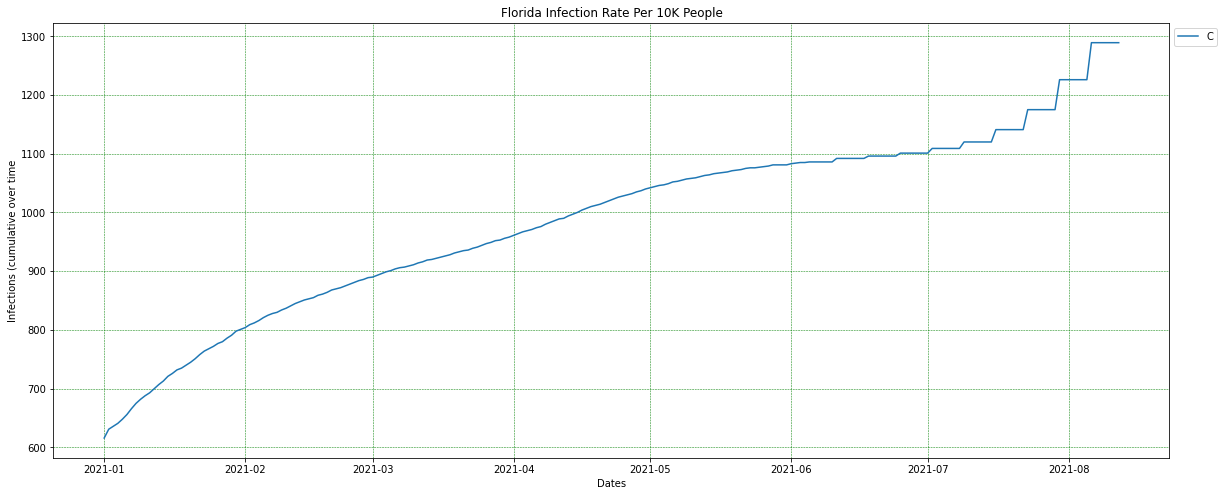

In [10]:
# isolate florida and dates starting [1/1/21 - today]
this_year_df = state_sum_conf1
ytd_df = this_year_df.loc[this_year_df['US_State'] == 'Florida']
fl = pd.DataFrame(ytd_df['US_State'])
ytd = pd.DataFrame(ytd_df.loc[:,'1/1/21':])
#del ytd['Confirmed_Totals']

# get FL population from death df
fl_pop = state_sum.loc[state_sum['US_State'] == 'Florida']
popl = fl_pop['Population']

# merge fl state name, population and ytd data
right = ytd
left = fl
fl_ytd_df = left.join(right)
fl_ytd_df = fl_ytd_df.join(popl)

# melt the df
melted_df = fl_ytd_df.melt(id_vars=['US_State', 'Population'],
               var_name = 'Date',
               value_name = 'Confirmed')
# convert the 'Date' column to datetime format
melted_df['Date']= pd.to_datetime(melted_df['Date'])
melted_df['Per_Capita(PER 10K People)'] = ((melted_df['Confirmed'] / melted_df['Population']) * 10000).round(0)
fig, ax = plt.subplots(figsize=(20,8))
plt.title('Florida Infection Rate Per 10K People')
plt.xlabel('Dates')
plt.ylabel('Infections (cumulative over time')
plt.grid(color='green', linestyle='--', linewidth=0.5)
x = melted_df['Date']
y = melted_df['Per_Capita(PER 10K People)']
ax.plot(x,y)
ax.legend('Confirmed', loc=2, bbox_to_anchor=(1.0, 1), borderaxespad=0.5)
#melted_df.tail()

##California

,US_State,Population,Date,Confirmed,Per_Capita(PER 10K People)
0,California,39512223,2021-01-01,2365024,599.0
1,California,39512223,2021-01-02,2415246,611.0
2,California,39512223,2021-01-03,2452262,621.0
3,California,39512223,2021-01-04,2490518,630.0
4,California,39512223,2021-01-05,2529480,640.0


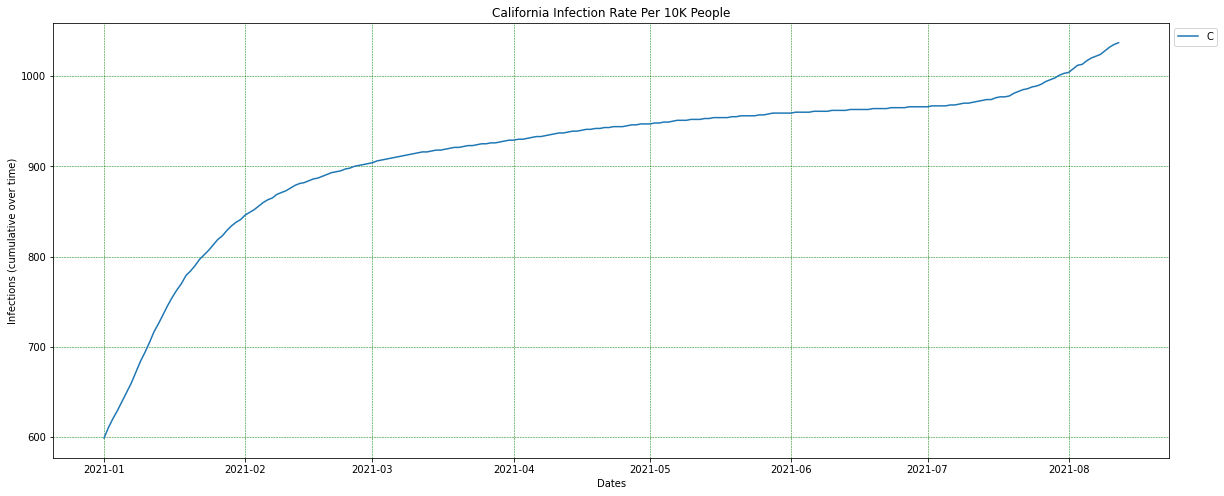

In [11]:
# isolate florida and dates starting [1/1/21 - today]
cali = this_year_df.loc[this_year_df['US_State'] == 'California']
cali_s = pd.DataFrame(cali['US_State'])
cali_ytd = pd.DataFrame(cali.loc[:,'1/1/21':])
#del cali_ytd['Confirmed_Totals']

# get FL population from death df
cali_pop = state_sum.loc[state_sum['US_State'] == 'California']
cal_popl = cali_pop['Population']

# merge fl state name, population and ytd data
right_df = cali_ytd
left_df = cali_s
cali_ytd_df = left_df.join(right_df)
cali_ytd_df = cali_ytd_df.join(cal_popl)

# melt the df
melted_ca_df = cali_ytd_df.melt(id_vars=['US_State', 'Population'],
               var_name = 'Date',
               value_name = 'Confirmed')
# convert the 'Date' column to datetime format
melted_ca_df['Date']= pd.to_datetime(melted_ca_df['Date'])
melted_ca_df['Per_Capita(PER 10K People)'] = ((melted_ca_df['Confirmed'] / melted_ca_df['Population']) * 10000).round(0)
fig, ax = plt.subplots(figsize=(20,8))
plt.title('California Infection Rate Per 10K People')
plt.xlabel('Dates')
plt.ylabel('Infections (cumulative over time)')
plt.grid(color='green', linestyle='--', linewidth=0.5)
x = melted_ca_df['Date']
y = melted_ca_df['Per_Capita(PER 10K People)']
ax.plot(x,y)
ax.legend('Confirmed', loc=2, bbox_to_anchor=(1.0, 1), borderaxespad=0.5)
melted_ca_df.head()

##Texas

,US_State,Population,Date,Confirmed,Per_Capita(PER 10K People)
0,Texas,28995881,2021-01-01,1782956,615.0
1,Texas,28995881,2021-01-02,1801181,621.0
2,Texas,28995881,2021-01-03,1816886,627.0
3,Texas,28995881,2021-01-04,1831146,632.0
4,Texas,28995881,2021-01-05,1864173,643.0


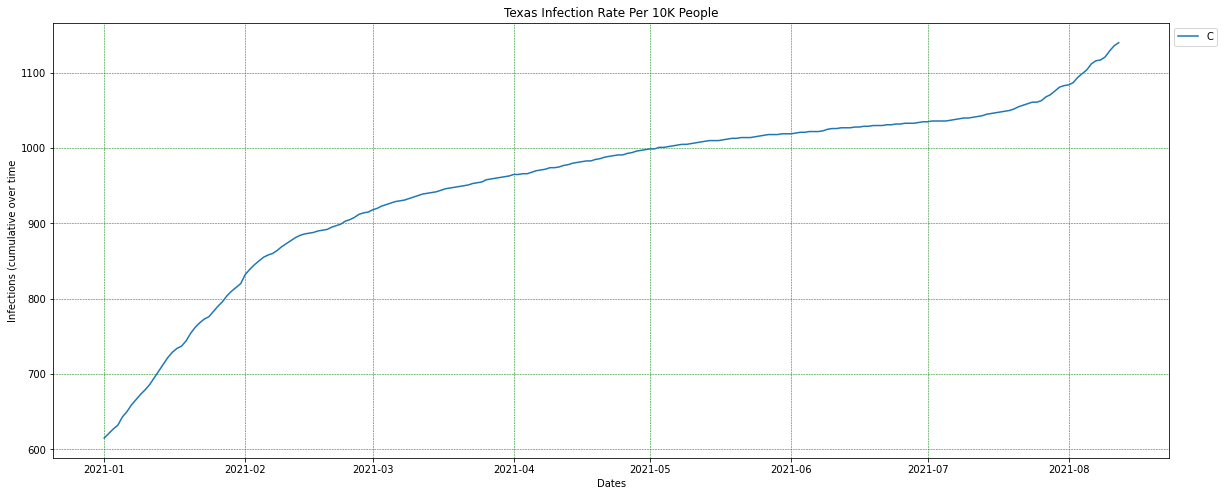

In [12]:
# isolate florida and dates starting [1/1/21 - today]
texas = this_year_df.loc[this_year_df['US_State'] == 'Texas']
texas_s = pd.DataFrame(texas['US_State'])
texas_ytd = pd.DataFrame(texas.loc[:,'1/1/21':])
#del texas_ytd['Confirmed_Totals']

# get FL population from death df
tx_pop = state_sum.loc[state_sum['US_State'] == 'Texas']
tx_popl = tx_pop['Population']

# merge fl state name, population and ytd data
right_d = texas_ytd
left_d = texas_s
tx_ytd_df = left_d.join(right_d)
tx_ytd_df = tx_ytd_df.join(tx_popl)

# melt the df
melted_tx_df = tx_ytd_df.melt(id_vars=['US_State', 'Population'],
               var_name = 'Date',
               value_name = 'Confirmed')
# convert the 'Date' column to datetime format
melted_tx_df['Date']= pd.to_datetime(melted_tx_df['Date'])
melted_tx_df['Per_Capita(PER 10K People)'] = ((melted_tx_df['Confirmed'] / melted_tx_df['Population']) * 10000).round(0)
fig, ax = plt.subplots(figsize=(20,8))
plt.title('Texas Infection Rate Per 10K People')
plt.xlabel('Dates')
plt.ylabel('Infections (cumulative over time')
plt.grid(color='green', linestyle='--', linewidth=0.5)
x = melted_tx_df['Date']
y = melted_tx_df['Per_Capita(PER 10K People)']
ax.plot(x,y)
ax.legend('Confirmed', loc=2, bbox_to_anchor=(1.0, 1), borderaxespad=0.5)
melted_tx_df.head()

##New York

,US_State,Population,Date,Confirmed,Per_Capita(PER 10K People)
0,New York,19453561,2021-01-01,995816,512.0
1,New York,19453561,2021-01-02,1011665,520.0
2,New York,19453561,2021-01-03,1023897,526.0
3,New York,19453561,2021-01-04,1035139,532.0
4,New York,19453561,2021-01-05,1048281,539.0


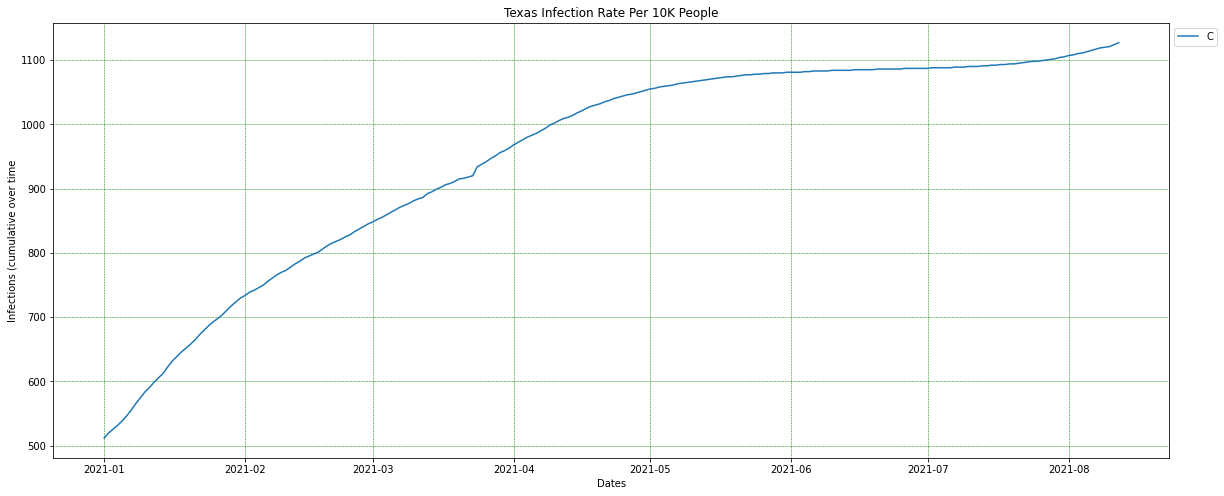

In [13]:
# isolate florida and dates starting [1/1/21 - today]
ny = this_year_df.loc[this_year_df['US_State'] == 'New York']
ny_s = pd.DataFrame(ny['US_State'])
ny_ytd = pd.DataFrame(ny.loc[:,'1/1/21':])
#del ny_ytd['Confirmed_Totals']

# get FL population from death df
ny_pop = state_sum.loc[state_sum['US_State'] == 'New York']
ny_popl = ny_pop['Population']

# merge fl state name, population and ytd data
right_DF = ny_ytd
left_DF = ny_s
ny_ytd_df = left_DF.join(right_DF)
ny_ytd_df = ny_ytd_df.join(ny_popl)

# melt the df
melted_ny_df = ny_ytd_df.melt(id_vars=['US_State', 'Population'],
               var_name = 'Date',
               value_name = 'Confirmed')
# convert the 'Date' column to datetime format
melted_ny_df['Date']= pd.to_datetime(melted_ny_df['Date'])
melted_ny_df['Per_Capita(PER 10K People)'] = ((melted_ny_df['Confirmed'] / melted_ny_df['Population']) * 10000).round(0)
fig, ax = plt.subplots(figsize=(20,8))
plt.title('Texas Infection Rate Per 10K People')
plt.xlabel('Dates')
plt.ylabel('Infections (cumulative over time')
plt.grid(color='green', linestyle='--', linewidth=0.5)
x = melted_ny_df['Date']
y = melted_ny_df['Per_Capita(PER 10K People)']
ax.plot(x,y)
ax.legend('Confirmed', loc=2, bbox_to_anchor=(1.0, 1), borderaxespad=0.5)
melted_ny_df.head()

# QUESTION 3:
##Using the infections data and recent trends in how cases are moving, please come up with a methodology for forecasting the number of cases you expect to see in these 4 states for the next 90 days.

##Import Prophet

In [14]:
# Time series forecasting using Facebook Prophet
import fbprophet

In [15]:
# Reference toolkit
dir(fbprophet)

['Prophet',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'diagnostics',
 'forecaster',
 'hdays',
 'make_holidays',
 'models',
 'plot']

##Initialize Model

In [16]:
# Initialize model
from fbprophet import Prophet
model = Prophet()
model.add_seasonality(name='monthly', period=30.5, fourier_order=5)

##Prepare Dataset

In [17]:
def prep_dataset(df):
  dataset = df
  data_df = dataset.melt(id_vars=['US_State'])
  data_df.rename(columns={'variable':'Date', 'value':'Confirmed'}, inplace=True)
  data_df['Date']= pd.to_datetime(data_df['Date'])
  df_grp = data_df.groupby('Date')[['Confirmed']].sum()
  df_grp = df_grp.reset_index()
  df_grp.rename(columns={'Date':'ds', 'Confirmed':'y'}, inplace=True)
  return df_grp

##New York Model

---



In [18]:
# New York dataset
nyc_data = prep_dataset(ny)
nyc_data.tail()

,ds,y
564,2021-08-08,2176658
565,2021-08-09,2178724
566,2021-08-10,2180696
567,2021-08-11,2187349
568,2021-08-12,2192224


#####Split dataset for Training and Testing

In [19]:
# Shape to aid in splitting data below
nyc_data.shape

(569, 2)

In [20]:
# Split dataset (train/test)
train = nyc_data[:450]
test = nyc_data[450:]

#####Fit model

In [21]:
# Fit model
model.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


#####Future dates for projection

In [22]:
# Future date
future_dates = model.make_future_dataframe(periods=365)
future_dates.tail()

,ds
810,2022-04-11
811,2022-04-12
812,2022-04-13
813,2022-04-14
814,2022-04-15


#####Forecast confirmed cases and plot results

In [23]:
#Forecasting future confirmed cases
forecast = model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
810,2022-04-11,4.991317e+06,2.140146e+06,8.194727e+06
811,2022-04-12,4.998772e+06,2.137584e+06,8.207002e+06
812,2022-04-13,5.006590e+06,2.134933e+06,8.232184e+06
813,2022-04-14,5.014695e+06,2.128578e+06,8.245244e+06
814,2022-04-15,5.023253e+06,2.130659e+06,8.248707e+06


In [ ]:
# Plot prediction
!pip install prophet
!pip install plot_plotly

In [39]:
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(model, forecast)

In [40]:
# Forecast trends 
plot_components_plotly(model, forecast)

##California Model

---



In [41]:
# California dataset
ca_data = prep_dataset(cali)
ca_data.tail()

,ds,y
564,2021-08-08,4047097
565,2021-08-09,4063317
566,2021-08-10,4076632
567,2021-08-11,4088383
568,2021-08-12,4097958


#####Split dataset for Training and Testing

In [42]:
# Shape to aid in splitting data below
ca_data.shape

(569, 2)

In [43]:
# Split dataset (train/test)
ca_train = ca_data[:450]
ca_test = ca_data[450:]

#####Fit Model

In [44]:
# Initialize model
cal_m = Prophet()
cal_m.add_seasonality(name='monthly', period=30.5, fourier_order=5)

# Fit model
cal_m.fit(ca_train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


#####Future dates for projection

In [45]:
# Future date
cal_future_dates = model.make_future_dataframe(periods=365)
cal_future_dates.tail()

,ds
810,2022-04-11
811,2022-04-12
812,2022-04-13
813,2022-04-14
814,2022-04-15


In [46]:
#Forecasting future confirmed cases
cal_forecast = cal_m.predict(cal_future_dates)
cal_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
810,2022-04-11,6.730920e+06,250617.866822,1.316486e+07
811,2022-04-12,6.738586e+06,229394.894544,1.320567e+07
812,2022-04-13,6.745265e+06,175073.329959,1.325009e+07
813,2022-04-14,6.751661e+06,215080.845120,1.323703e+07
814,2022-04-15,6.760773e+06,146813.096358,1.331231e+07


#####Forecast confirmed cases and plot results

In [47]:
# Plot prediction
plot_plotly(cal_m, cal_forecast)

In [48]:
# Forecast trends 
plot_components_plotly(cal_m, cal_forecast)

##Texas Model

---



In [ ]:
# Texas dataset
tx_data = prep_dataset(texas)
tx_data.tail()

,ds,y
496,2021-06-01,2954084
497,2021-06-02,2956576
498,2021-06-03,2959171
499,2021-06-04,2961257
500,2021-06-05,2962395


#####Split dataset for Training and Testing

In [ ]:
# Shape to aid in splitting data below
tx_data.shape

(501, 2)

In [ ]:
# Split dataset (train/test)
tx_train = tx_data[:450]
tx_test = tx_data[450:]

#####Future dates for projection

In [ ]:
# Future date
txs_future_dates = model.make_future_dataframe(periods=365)
txs_future_dates.tail()

,ds
810,2022-04-11
811,2022-04-12
812,2022-04-13
813,2022-04-14
814,2022-04-15


#####Fit Model


In [ ]:
# Initialize model
txs_m = Prophet()
txs_m.add_seasonality(name='monthly', period=30.5, fourier_order=5)

# Fit model
txs_m.fit(tx_train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


#####Forecast confirmed cases and plot results

In [ ]:
#Forecasting future confirmed cases
txs_forecast = txs_m.predict(txs_future_dates)
txs_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
810,2022-04-11,6.029312e+06,2.968174e+06,9.239529e+06
811,2022-04-12,6.037842e+06,2.982935e+06,9.256390e+06
812,2022-04-13,6.045586e+06,2.943451e+06,9.268308e+06
813,2022-04-14,6.052850e+06,2.947568e+06,9.241780e+06
814,2022-04-15,6.063334e+06,2.949655e+06,9.289174e+06


In [ ]:
# Plot prediction
plot_plotly(txs_m, txs_forecast)

In [ ]:
# Forecast trends 
plot_components_plotly(txs_m, txs_forecast)

##Florida Model

---



In [ ]:
# Texas dataset
fl_data = prep_dataset(ytd_df)
fl_data.tail()

,ds,y
496,2021-06-01,2326755
497,2021-06-02,2327989
498,2021-06-03,2329867
499,2021-06-04,2329867
500,2021-06-05,2332867


#####Split dataset for Training and Testing

In [ ]:
# Shape to aid in splitting data below
fl_data.shape

(501, 2)

In [ ]:
# Split dataset (train/test)
fl_train = fl_data[:450]
fl_test = fl_data[450:]

#####Fit Model

In [ ]:
# Initialize model
fl_m = Prophet()
fl_m.add_seasonality(name='monthly', period=30.5, fourier_order=5)

# Fit model
fl_m.fit(fl_train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


#####Future dates for projection

In [ ]:
# Future date
fl_future_dates = model.make_future_dataframe(periods=365)
fl_future_dates.tail()

,ds
810,2022-04-11
811,2022-04-12
812,2022-04-13
813,2022-04-14
814,2022-04-15


#####Forecast confirmed cases and plot results


In [ ]:
#Forecasting future confirmed cases
fl_forecast = fl_m.predict(fl_future_dates)
fl_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
810,2022-04-11,4.454468e+06,1.334839e+06,7.789758e+06
811,2022-04-12,4.460312e+06,1.325088e+06,7.804766e+06
812,2022-04-13,4.466352e+06,1.325598e+06,7.846662e+06
813,2022-04-14,4.472960e+06,1.320276e+06,7.873184e+06
814,2022-04-15,4.480011e+06,1.313883e+06,7.880977e+06


In [ ]:
# Plot prediction
plot_plotly(fl_m, fl_forecast)

In [ ]:
# Forecast trends 
plot_components_plotly(fl_m, fl_forecast)